In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject_BA/NVL Historical Data 1_6.csv')

# Data preprocessing
df['Price'] = df['Price'].str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df = df[::-1]
df.set_index('Date', inplace=True)

In [3]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-02,27815.0,"27,645","27,900","27,645",837.75K,0.61%
2018-01-03,28410.0,"27,815","28,452","27,815",2.08M,2.14%
2018-01-04,28707.0,"28,410","28,750","28,028",2.66M,1.05%
2018-01-05,28962.0,"28,622","29,047","28,452",2.55M,0.89%
2018-01-08,29556.0,"28,877","29,641","28,877",2.72M,2.05%


In [4]:
# Create index as feature
df['Index'] = np.arange(len(df))

In [5]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [6]:
# Create features and labels
X_train = train_data['Index'].values.reshape(-1, 1)
y_train = train_data['Price'].values
X_test = test_data['Index'].values.reshape(-1, 1)
y_test = test_data['Price'].values

In [7]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [8]:
# Calculate metrics
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
test_mae = mean_absolute_error(y_test, test_predict)
test_mape = np.mean(np.abs(test_predict - y_test) / np.abs(y_test)) * 100

print(f'Testing RMSE: {test_rmse}')
print(f'Testing MAE: {test_mae}')
print(f'Testing MAPE: {test_mape}')

Testing RMSE: 60526.703554930384
Testing MAE: 60445.646447827225
Testing MAPE: 397.6769879442319


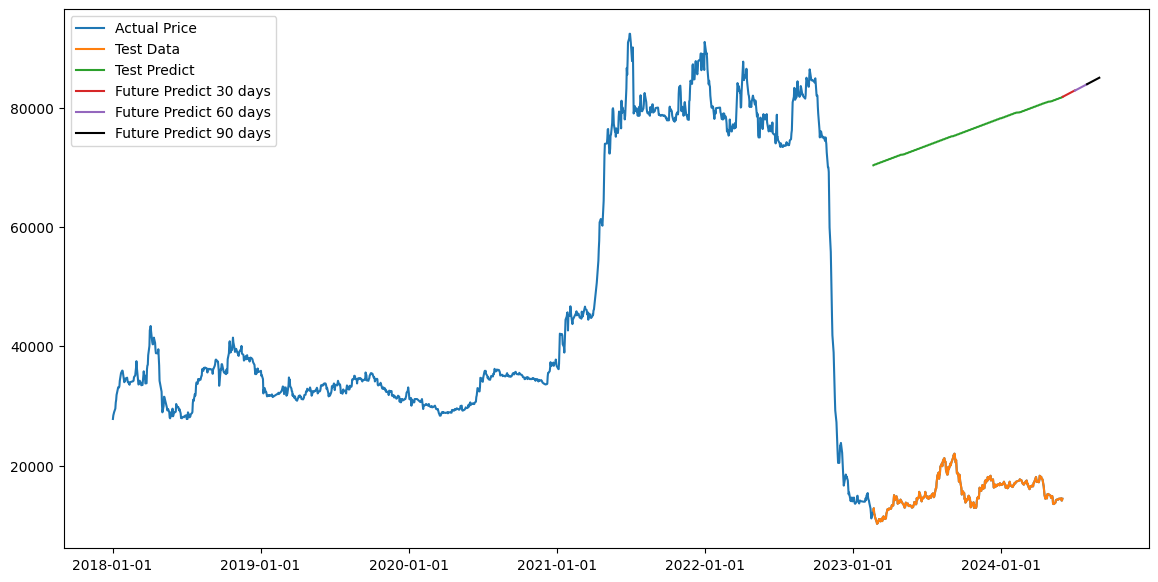

In [9]:
import matplotlib.dates as mdates
future_index = np.arange(len(df), len(df) + 90).reshape(-1, 1)
future_predict = model.predict(future_index)

# Calculate the start date and end dates for the future predictions
start_date = df.index[-1] + pd.Timedelta(days=1)
end_date_30 = start_date + pd.Timedelta(days=30)
end_date_60 = start_date + pd.Timedelta(days=60)
end_date_90 = start_date + pd.Timedelta(days=90)

# Create date ranges for the future predictions
predict_dates_30 = pd.date_range(start=start_date, end=end_date_30)
predict_dates_60 = pd.date_range(start=end_date_30, end=end_date_60)
predict_dates_90 = pd.date_range(start=end_date_60, end=end_date_90)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot actual data
plt.plot(df.index, df['Price'], label='Actual Price')

# Plot test data and predictions
plt.plot(test_data.index, y_test, label='Test Data')
plt.plot(test_data.index, test_predict, label='Test Predict')

# Plot future predictions for 30, 60, and 90 days
plt.plot(predict_dates_30, future_predict[:31], label='Future Predict 30 days')
plt.plot(predict_dates_60, future_predict[29:60], label='Future Predict 60 days')
plt.plot(predict_dates_90, future_predict[59:], label='Future Predict 90 days', color='black')

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Display the legend
plt.legend()

# Display the plot
plt.show()
